In [1]:
!pip install easyocr
!pip install imutils

You should consider upgrading via the 'c:\users\yashwanthsai.tirukko\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=0dcf625e15d1561614414fb5e164e5986dde466eb8243bc076e76aacf9ae40f1
  Stored in directory: c:\users\yashwanthsai.tirukko\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


You should consider upgrading via the 'c:\users\yashwanthsai.tirukko\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [21]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np 
import imutils 
import easyocr 


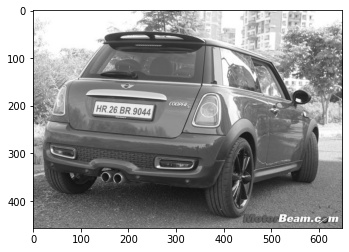

In [22]:
img = cv2.imread("image1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

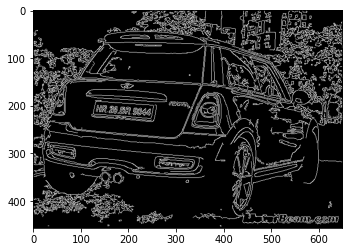

In [23]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 10, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [24]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [25]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break 

In [26]:
location 

array([[[126, 216]],

       [[133, 191]],

       [[252, 200]],

       [[246, 227]]], dtype=int32)

In [27]:
mask = np.zeros(gray.shape, np.uint8)
new_image =  cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask= mask)

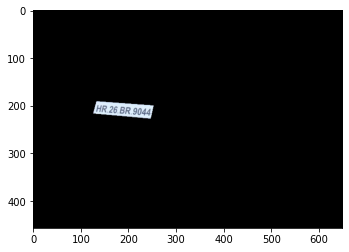

In [28]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [29]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

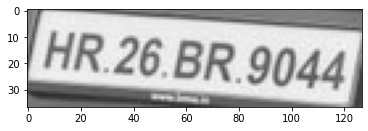

In [30]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [31]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result 

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |--------------------------------------------------| 1.6% Complete

Progress: |██------------------------------------------------| 4.5% Complete

Progress: |███-----------------------------------------------| 7.6% Complete

Progress: |█████---------------------------------------------| 10.4% Complete

Progress: |██████--------------------------------------------| 13.8% Complete

Progress: |████████------------------------------------------| 17.0% Complete

Progress: |██████████----------------------------------------| 20.1% Complete

Progress: |███████████---------------------------------------| 23.3% Complete

Progress: |█████████████-------------------------------------| 26.1% Complete

Progress: |██████████████------------------------------------| 28.7% Complete

Progress: |████████████████----------------------------------| 32.0% Complete

Progress: |█████████████████---------------------------------| 35.5% Complete

Progress: |███████████████████-------------------------------| 38.6% Complete

Progress: |████████████████████------------------------------| 41.9% Complete

Progress: |██████████████████████----------------------------| 44.6% Complete

Progress: |███████████████████████---------------------------| 47.2% Complete

Progress: |████████████████████████--------------------------| 50.0% Complete

Progress: |██████████████████████████------------------------| 53.3% Complete

Progress: |████████████████████████████----------------------| 56.8% Complete

Progress: |██████████████████████████████--------------------| 60.1% Complete

Progress: |███████████████████████████████-------------------| 63.3% Complete

Progress: |█████████████████████████████████-----------------| 66.8% Complete

Progress: |███████████████████████████████████---------------| 70.2% Complete

Progress: |████████████████████████████████████--------------| 73.7% Complete

Progress: |██████████████████████████████████████------------| 77.2% Complete

Progress: |███████████████████████████████████████-----------| 79.2% Complete

Progress: |█████████████████████████████████████████---------| 82.0% Complete

Progress: |██████████████████████████████████████████--------| 85.3% Complete

Progress: |████████████████████████████████████████████------| 88.8% Complete

Progress: |█████████████████████████████████████████████-----| 91.9% Complete

Progress: |███████████████████████████████████████████████---| 95.4% Complete

Progress: |█████████████████████████████████████████████████-| 98.4% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |████----------------------------------------------| 8.9% Complete

Progress: |█████████-----------------------------------------| 19.3% Complete

Progress: |███████████████-----------------------------------| 30.3% Complete

Progress: |████████████████████------------------------------| 41.0% Complete

Progress: |██████████████████████████------------------------| 52.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[2, 4], [126, 4], [126, 34], [2, 34]], 'HR.26 BR.9044', 0.5781259495466393)]